# Analysis of bike sharing demands in Seoul 



## Introduction 

This project focuses on analyzing the factors influencing bike rentals for a bike-sharing company. Specifically, we aim to investigate whether temperature has a significant impact on the number of bikes rented. The dataset contains information from the years 2017 and 2018, including various variables such as daily temperature, weather conditions, and historical bike rental data. 
Our goal is to use this data to build a predictive model that can estimate the number of bikes that will be rented for each month. The model will help the company optimize bike availability and manage resources more efficiently based on temperature forecasts and other environmental factors

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. Each coloumn in “SeoulBikeData.csv” have the following description:

    Date : the date of the day
    Rented Bike Count : number of rented bike
    Hour : the time in hour 
    Temperature(°C) : the temperature at this time 
    Humidity(%) : the pourcentage of humidity at this time
    Wind speed (m/s) : the wind speed in m/s at this time
    Visibility (10m) : the visibility per 10m at this time
    Dew point temperature(°C) : the dew point temperature of day 
    Solar Radiation (MJ/m2) : the solar radiation in MJ/m2 at this time
    Rainfall(mm) : the rain in mm at this time
    Snowfall (cm) : the snowfalls in cm at this time
    Seasons : the season of the day
    Holiday : if the day is in holiday or not
    Functioning Day : 




## Business Understanding 

The city of Seoul is well organized for bikes, like cites in Danmark, and there is a good organistton for renting bikes. As so, the bikes renting data, from a company,  have been collected and put in a database called “SeoulBikeData.csv”. With those data you can know the number of rented bike every hour from 2017 to 2019. The dataset allow us to see the cycles of bike renting every year. In fact, with those data the companies might want to forecast the bike renting, compared to the weather conditions,the day or the season. 
The purpuse of the project will be to design a model that could help the bike companies to deal with the bike stock with the wether forcast and the period. 
The following research question (RQ) havebeen formulated:

**"Determine the optimum number of bikes needed each time of day based on hour, temperature and solar radiation."**




## Data collection

The dataset that we use is from UC Irvine Machine Learning repository. It is composed of 14 columns (the features) and 8760 rows (the data). We choose this dataset because it can be useful in real life for real business and to see if its possible to forecast the number of rented bike. 
First in this part we are going to see how is the dataset and which feature are useful.

### The Library
Libraries are crucial for expanding Python’s capabilities, improving eﬀiciency, and offering solutions for a broad spectrum of tasks. To get started, it’s necessary to import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import math
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut, cross_val_score
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

pandas library enable to managing and preparing the data.
numpy library contribute to handling numerical operations.
matplotlib library contribute to better data visualization.
seaborn library is employed to create visualizations of statistical data.
sklearn library is employed for machine learning and modelling.

## Data Cleaning and Data Preparation


After introducing the different libraries to the program it is possible to import the single dataset at disposal.
The dataset has 8760 rows and 14 columns, the latter referred to as many features.

Data cleaning and data manipulation are necessary steps before take a closer look at the data

Further data cleaning and exploration are shown as to separate steps. In some cases exploration needs to happen while doing data cleaning because it can become an iterative process. Data cleaning is a fundamental step in any data science and machine learning project. It involves the identification and adjustment of data quality issues, which can significantly impact the accuracy and reliability of subsequent analyses and models development.




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.shape

(8760, 14)

In [5]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
df.duplicated().sum()

0

Through this line is possible to see that the dataset doesn't contain any categorical data for each feature analyzed.

Furtherome the inevstigation of duplicates led to the conclusion that duplicated cells nor values are included in the original dataframe.
As a conclusion number of rows and columns have remained the same.

Missing data can arise for various reasons, such as incomplete records or data entry errors. By examining these columns, a deeper understanding is gained of the dataset’s characteristics. A identification of which columns have missing values and assess whether these gaps can be filled with reasonable imputations.
In our specific case no missing values were reported.



In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## Data Manipulation

Data manipulation can be crucial in order to make data exploration phase easier.
In our case, the main temporal feature was the days of the year. To simplify data analysis and exploration, additional features were created, including days of the week, months, and seasons of the year.
As a result, three new columns—and therefore three new features—were added to the existing 14 features in the database, bringing the total to 17 features.

In [8]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)\s*", "", regex=True)
df.columns = df.columns.str.replace(" ", "_", regex=False)

In [9]:
df.columns = [x.lower() for x in df.columns]

In [10]:
df["date"] = pd.to_datetime(df["date"], dayfirst = True)
df["day"] = df['date'].dt.day
df["month"] = df['date'].dt.month
df["year"] = df['date'].dt.year
df["weekday"] = df['date'].dt.day_name()

In [11]:
df['seasons'] = df['seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
df['holiday'] = df['holiday'].map({"No Holiday": 0, "Holiday": 1})
df['weekday'] = df['weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7})

In [12]:
df=df.drop(['functioning_day'], axis = 1)

## Heat Map
In the following section, the heat map is introduced in order to discover correlations between the numerical features
The heat map shows that there is a correlation between some features:
The main feature to analyze "rented bike count" shows acceptable and relevant level of correlations with seasonality, temperature, dew point temperature (referred to the temperature at which the external air became dry --> strictly linked to humidity).


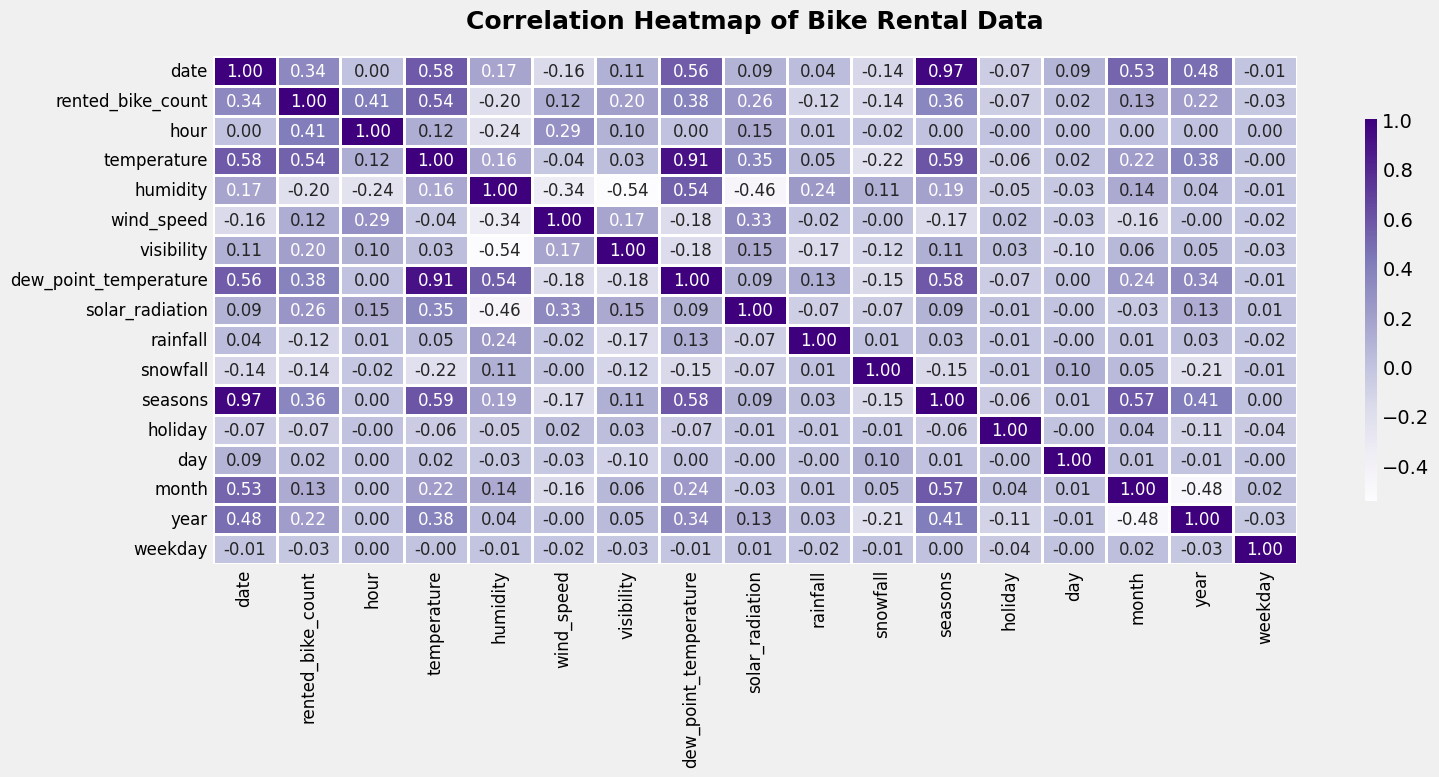

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.corr(), 
            annot=True, 
            fmt='1.2f', 
            annot_kws={'size': 12},
            linewidths=1, 
            linecolor='white',
            cmap='Purples',
            cbar_kws={"shrink": 0.75, "aspect": 30})

plt.title('Correlation Heatmap of Bike Rental Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout()
plt.show()

## Data Exploration

In this section, we conduct a thorough exploration of the dataset, employing visualization techniques and examining correlations between features to gain a deeper understanding.


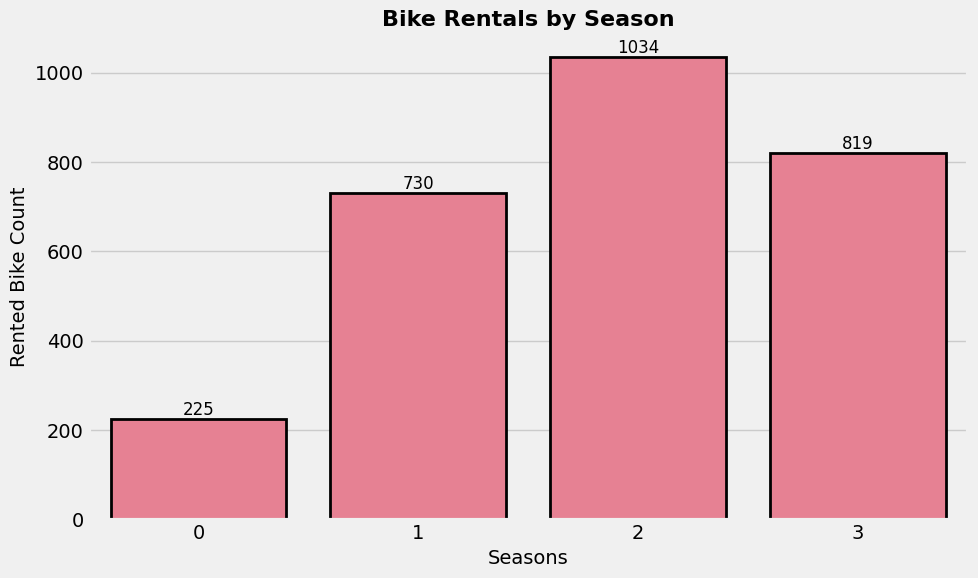

In [14]:
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

ax = sns.barplot(x="seasons", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Season", fontsize=16, fontweight='bold')
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Starting from visualization of The number of bike rented per season through years
and then breakdown the same variables per month and by hour of the day, thus is displayed that mainly during summer and autumn the peak of rented bike is reached due to favourable weather conditions as confirmed by plot referred to bike rentals by month, highlighting that starting from May until October  (peak in June) rental bike services are exploited.


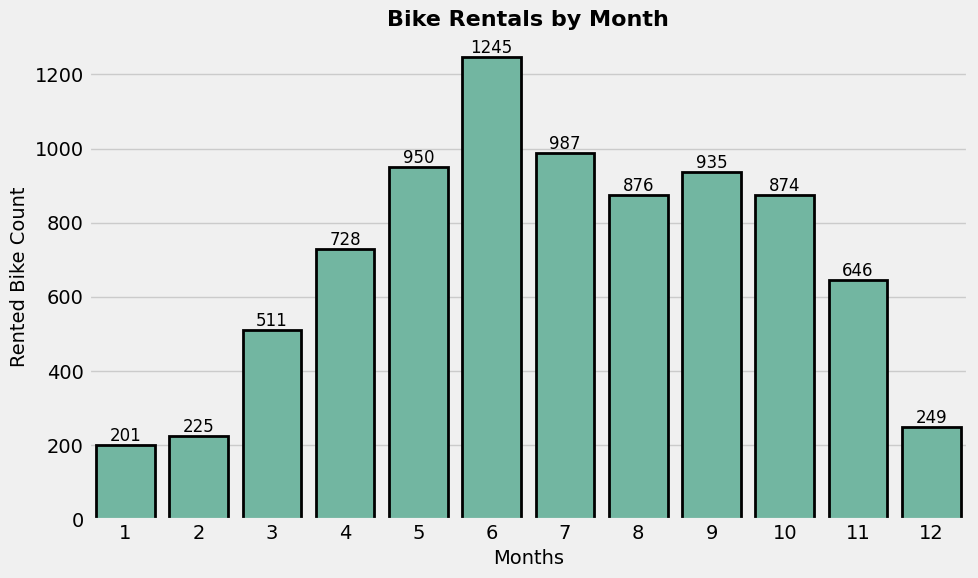

In [15]:
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

ax = sns.barplot(x="month", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Month", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

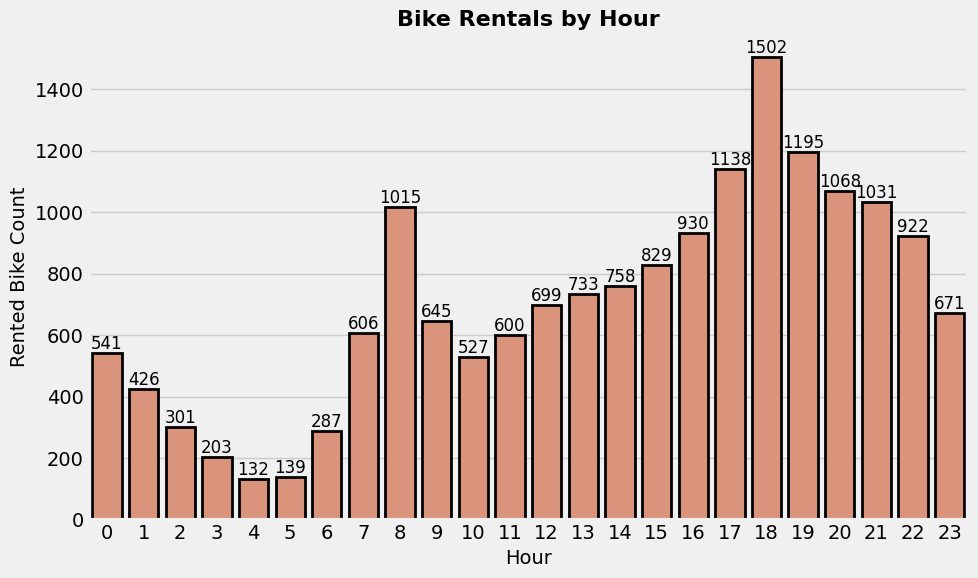

In [16]:
plt.figure(figsize=(10, 6))
sns.set_palette("flare")

ax = sns.barplot(x="hour", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

While the rented bike per hour can help understand the most likely reasons are for commuting home and work and hang out/ moving around the city during evening/dinner/after dinner.

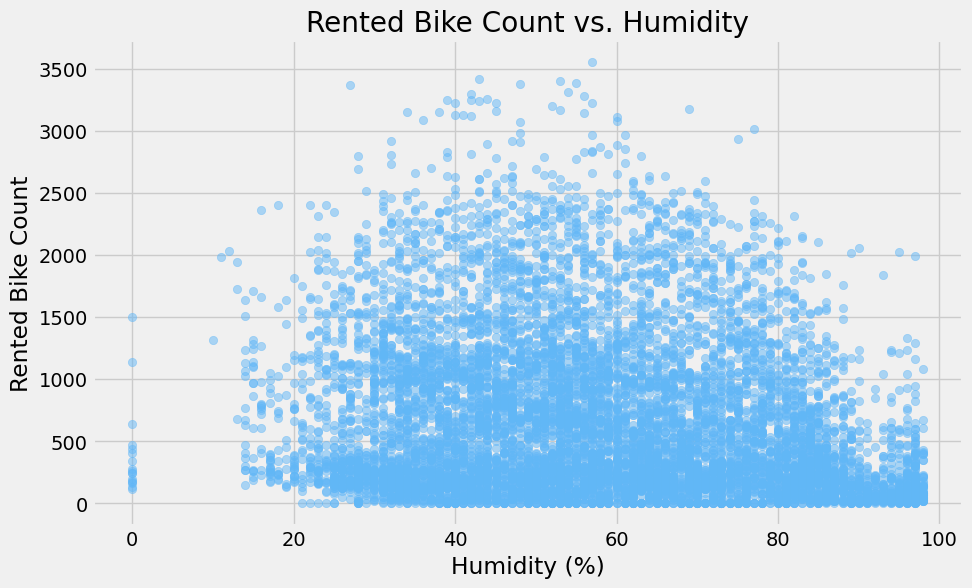

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['rented_bike_count'], c="#61b7f7", alpha=0.5)
plt.title('Rented Bike Count vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

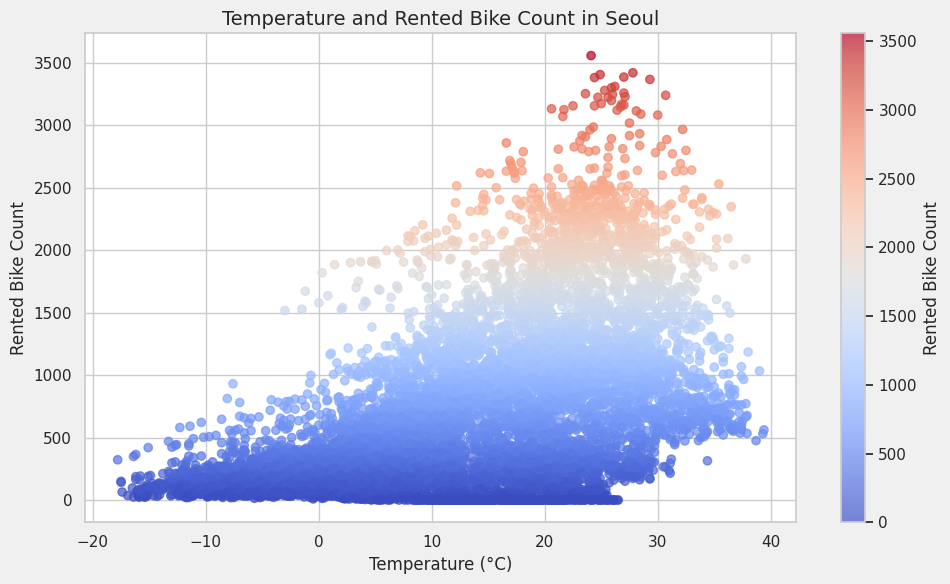

In [18]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

scatter = plt.scatter(x=df['temperature'], y=df['rented_bike_count'], 
                      c=df['rented_bike_count'], cmap='coolwarm', alpha=0.7)

plt.title('Temperature and Rented Bike Count in Seoul', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

plt.colorbar(scatter, label='Rented Bike Count')

plt.tight_layout()
plt.show()

## Ralation between the temperature and the Rented bikes

In this part we wanted to see the regression of the rented bikes and only the temperature as a parameter. The method we is already in the seaborn library and it will put the linear regression of the rented bike with temperature. 

Text(0, 0.5, 'Rented Bike Count')

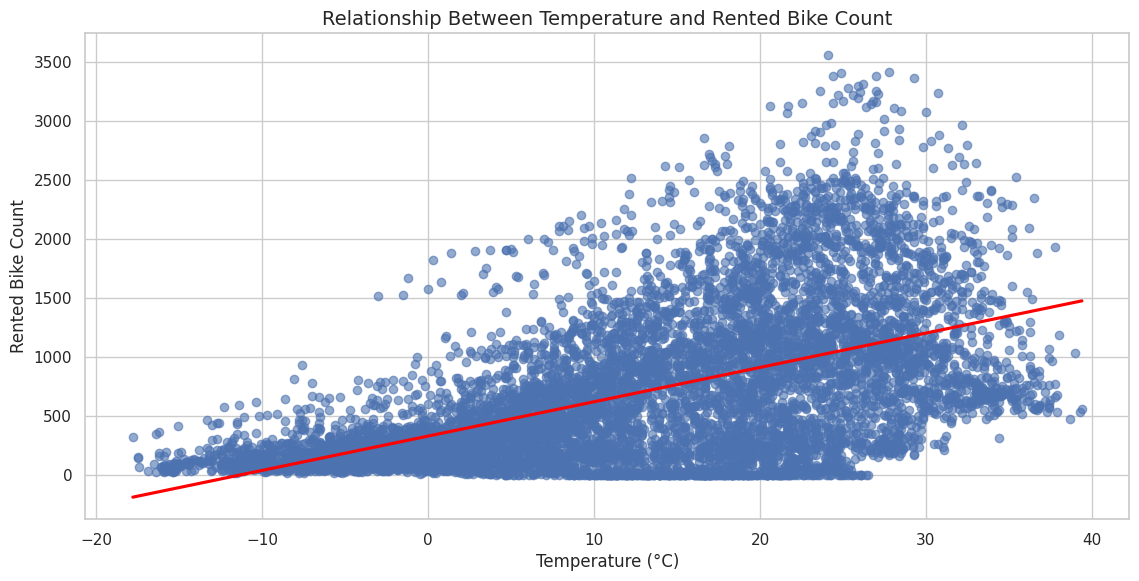

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Regression plot
sns.regplot(
    x=df['temperature'], y=df['rented_bike_count'],
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)

# Add title and labels
plt.title('Relationship Between Temperature and Rented Bike Count', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

In [20]:
# Define the data frame
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'temperature': df['temperature']})
X[:5]

,intercept,temperature
0,1.0,-5.2
1,1.0,-5.5
2,1.0,-6.0
3,1.0,-6.2
4,1.0,-6.0


In [21]:
y= df['rented_bike_count']
model = sm.OLS(y,X) # does not fit the model, but specifies it 
results = model.fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rented_bike_count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:28:08   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     329.9525      8.541     38.631      0.000     313.210     346.695
temperature    29.0811      0.486     59.816      0.000      28.128      30.034
==============================================================================
Omnibus:                      954.681   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.965
Skew:                           0.817   Prob(JB):                    1.68e-309
Kurtosis:                       4.108   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
new_df = pd.DataFrame({'intercept': np.ones(3), 'temperature': [1,6,-9]})
new_df

,intercept,temperature
0,1.0,1
1,1.0,6
2,1.0,-9


In [24]:
new_predictions = results.get_prediction(new_df)

In [25]:
new_predictions.predicted_mean

array([359.03361294, 504.43910789,  68.22262305])

In [26]:
# Produce confidence intervals for the predicted values:
new_predictions.conf_int(alpha=0.05)

array([[342.97691266, 375.09031322],
       [491.30143052, 517.57678526],
       [ 44.46360153,  91.98164457]])

In [27]:
# Prediction intervals are computed by setting obs=True:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[-706.47185251, 1424.53907839],
       [-561.02636685, 1569.90458262],
       [-997.42674254, 1133.87198864]])

In [28]:
def abline(ax, b, m): # defining the function 
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] +b, m*xlim[1] +b]
    ax.plot(xlim, ylim)

In [29]:
# Including additional arguments: *args allows a number of non-named arguments to abline
def abline(ax,b,m, *args, **kwargs): # **kwards allows any number of named arguments, e.g., linewith=3 to abiline
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m *xlim[0]+b,m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)

/tmp/ipykernel_100867/615515267.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipykernel_100867/615515267.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


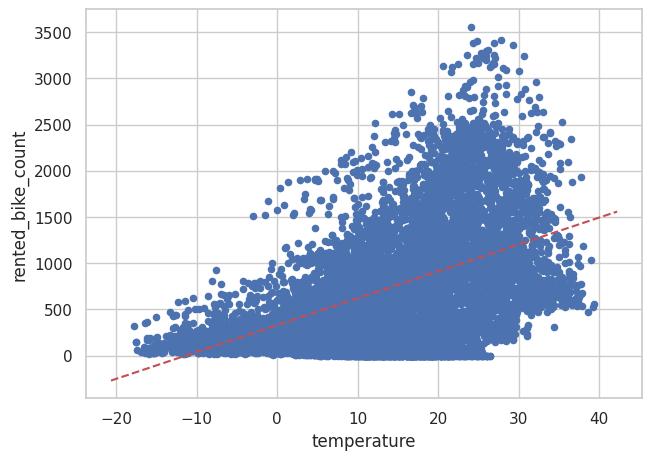

In [30]:
# Let's use the new function and add the regression line to the plot of medv vs. lstat:
ax = df.plot.scatter('temperature', 'rented_bike_count')
abline(ax,
      results.params[0],
      results.params[1],
      'r--')#, # produces a red dashed line
      #linewith=3) # should define the line width

On the graph, we can see that the temperature is not the realy linear other parameters have to be in the regression to have something more precise, because we have to much uncertainity to forecast the number of rented bike. 

## MODELS AND FINDING THE FEATURE

The purpuse now will be now to find the best feature to create the best model that would have the best forecast of the rented bike. First, we try to create a multilinear regression with all the feature. The model that we are going to implement will be use the Ordinary Least Squared Method (OLS) from the sklearn library.

## Train a multiple linear regression model

In [31]:
#First Test we try with the regular OLS with some variables of the data set to see if we have a better accuracy
# model before:
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'temperature': df['temperature'], 'humidity' : df['humidity'], 'rain': df['rainfall'], 'hour' : df['hour'], 'weekday': df['weekday'] })
model_2pred = sm.OLS(y,X)
results_2pred = model_2pred.fit()
results_2pred.summary(model_2pred)
X

,intercept,temperature,humidity,rain,hour,weekday
0,1.0,-5.2,37,0.0,0,5
1,1.0,-5.5,38,0.0,1,5
2,1.0,-6.0,39,0.0,2,5
3,1.0,-6.2,40,0.0,3,5
4,1.0,-6.0,36,0.0,4,5
...,...,...,...,...,...,...
8755,1.0,4.2,34,0.0,19,5
8756,1.0,3.4,37,0.0,20,5
8757,1.0,2.6,39,0.0,21,5
8758,1.0,2.1,41,0.0,22,5


In [32]:
new_de2 = pd.DataFrame({'intercept': np.ones(3), 'temperature': [1,7,10], 'humidity' : [37,70,40], 'rain': [0,0,0], 'hour' : [19,8,7], 'weekday': [1,7,3] })
new_de2

,intercept,temperature,humidity,rain,hour,weekday
0,1.0,1,37,0,19,1
1,1.0,7,70,0,8,7
2,1.0,10,40,0,7,3


In [33]:
new_predictions = results_2pred.get_prediction(new_de2)
new_predictions.predicted_mean

array([734.67301278, 345.9482463 , 623.07121445])

<hr>

<h1 id="LR">Multiple Linear Regression</h1>

In [34]:
# All the following code from Raphael 

<h3 id="LR">1. Train and refine multiple linear regression models</h3>

First, a multiple linear regression model is trained with all 15 variables of the data set **(Model 1)**.

In [35]:
# MODEL 1 (all 15 variables) 
data_1 = df.columns.drop(['rented_bike_count', 'date'])
X_1 = MS(data_1).fit_transform(df)
y_1 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()
# results_1.summary(model_1)
print('Results model 1 (all 15 variables)')
print('R-squared:', results_1.rsquared.round(4))
print('Adj. R-squared:', results_1.rsquared_adj.round(4))
print('F-statistic:', results_1.fvalue.round(4))
print('AIC:', results_1.aic.round(4))
print('----------------------------------')
print('Values for all variables:')
print(results_1.pvalues.round(4))

Results model 1 (all 15 variables)
R-squared: 0.4868
Adj. R-squared: 0.486
F-statistic: 553.0188
AIC: 132387.7341
----------------------------------
Values for all variables:
intercept                0.0000
hour                     0.0000
temperature              0.0000
humidity                 0.0000
wind_speed               0.0065
visibility               0.7403
dew_point_temperature    0.3646
solar_radiation          0.0000
rainfall                 0.0000
snowfall                 0.0443
seasons                  0.0000
holiday                  0.0000
day                      0.6416
month                    0.0000
year                     0.0000
weekday                  0.0000
dtype: float64


**Model 1** (all 15 variables) results in an R^2 of 0.487 and can therefore be classified as a model with insufficient accuracy.
In addition, some variables (e.g. visibility, dew_point_temperature and day) have very high P-values. These variables therefore have no significant influence on the target variable.\
In **Model 2**, we only use variables that are considered significant with regard to the correlation to rented_bike_count. This also reduces the model complexity.

In [36]:
# Identifying significant features based on correlation to rented_bike_count
corr = df.corr()
features = corr["rented_bike_count"]
significant_features = features[features.abs() > 0.199]
significant_features

date                     0.340772
rented_bike_count        1.000000
hour                     0.410257
temperature              0.538558
humidity                -0.199780
visibility               0.199280
dew_point_temperature    0.379788
solar_radiation          0.261837
seasons                  0.359687
year                     0.215162
Name: rented_bike_count, dtype: float64

In [37]:
# MODEL 2 (8 significant variables) 
data_2 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday'])
X_2 = MS(data_2).fit_transform(df)
y_2 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
# results_2.summary(model_2)
print('Results model 2 (8 significant variables)')
print('R-squared:', results_2.rsquared.round(4))
print('Adj. R-squared:', results_2.rsquared_adj.round(4))
print('F-statistic:', results_2.fvalue.round(4))
print('AIC:', results_2.aic.round(4))
print('----------------------------------')
print('Values for all variables:')
print(results_2.pvalues.round(4))

Results model 2 (8 significant variables)
R-squared: 0.469
Adj. R-squared: 0.4685
F-statistic: 966.275
AIC: 132672.461
----------------------------------
Values for all variables:
intercept                0.5333
hour                     0.0000
temperature              0.0000
humidity                 0.0000
visibility               0.9035
dew_point_temperature    0.0123
solar_radiation          0.0000
seasons                  0.0000
year                     0.5448
dtype: float64


With R^2 of 0.469, **Model 2** has a lower R^2 value than Model 1.
The adjusted R^2, which takes model complexity into account and can be considered a fairer measure of model quality, is also worse than in Model 1.
It should be mentioned that the visibility variable has a high P-value of 0.903.\
The variance inflation factors (VIF) are now calculated below. **Model 3** takes into account the high P-value of visibility and the VIF values. 

In [38]:
# Compute the VIFs (Variance inflation factors)
vals = [VIF(X_2, i)
    for i in range(1, X_2.shape[1])]
vif = pd.DataFrame({'vif':vals},
                  index=X_2.columns[1:])
print(vif)

                              vif
hour                     1.114018
temperature             86.445397
humidity                19.585110
visibility               1.621341
dew_point_temperature  113.512721
solar_radiation          1.896910
seasons                  1.760135
year                     1.253176


In [39]:
# MODEL 3 (5 significant variables)
data_3 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday', 
                          'visibility', 'dew_point_temperature', 'year'])
X_3 = MS(data_3).fit_transform(df)
y_3 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
# results_3.summary(model_3)
print('Results model 3 (5 significant variables)')
print('R-squared:', results_3.rsquared.round(4))
print('Adj. R-squared:', results_3.rsquared_adj.round(4))
print('F-statistic:', results_3.fvalue.round(4))
print('AIC:', results_3.aic.round(4))
print('----------------------------------')
print('Values for all variables:')
print(results_3.pvalues.round(4))

Results model 3 (5 significant variables)
R-squared: 0.4686
Adj. R-squared: 0.4683
F-statistic: 1544.026
AIC: 132673.2223
----------------------------------
Values for all variables:
intercept          0.0
hour               0.0
temperature        0.0
humidity           0.0
solar_radiation    0.0
seasons            0.0
dtype: float64


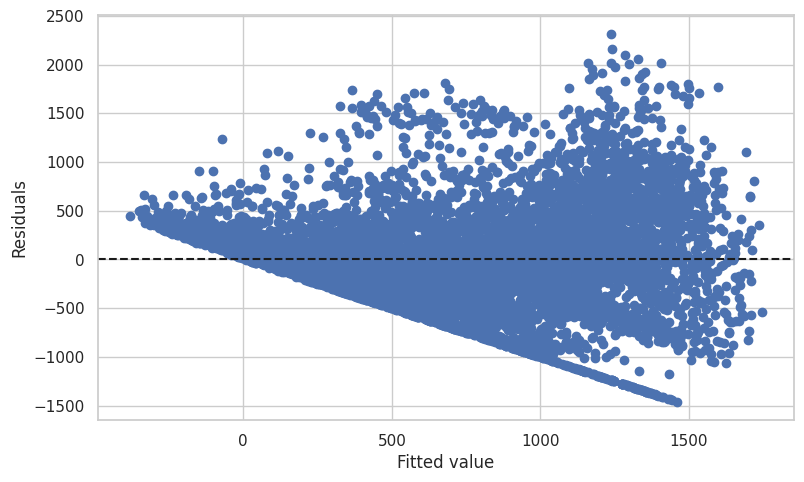

In [40]:
# Visualization of the residuals against the estimated values (fitted values) of a regression analysis
plot_3 = subplots(figsize=(8,5))[1]
plot_3.scatter(results_3.fittedvalues, results_3.resid)  # Creates the scatterplot
plot_3.set_xlabel('Fitted value')  
plot_3.set_ylabel('Residuals')
plot_3.axhline(0, c='k', ls='--'); 

**Evaluation of the results:** \
Model 3 has the same high model performance as Model 2 (R^2 = 0.469, Adj. R^2 = 0.468).\
The residual plot shows a clear funnel shape, which indicates that the variance of the residuals is not constant. The systematic deviation from the zero line indicates that further improvements to the model are required.\
The F-statistic indicates that Model 3 (F-statistic = 1544) is significantly better than Model 2 (F-statistic = 966). The higher F-statistic indicates that the additional variables in Model 3 may have a stronger influence on model performance.\
However, Model 3 has a lower AIC value (AIC = 132673) than Model 2 (AIC = 132672) and Model 1 (AIC = 132387), which indicates a lower model quality.\
Since Model 3 reduces significantly the model complexity, we continue to use Model 3 in the following steps and accept a lower model performance.

<h4 id="LR">2. Using rented_bike_count_intervalls for the multiple linear regression model</h4>

During the modeling phase, the idea arose to predict an interval for rented_bike_count instead of the numerical target variable (exact number of rented_bike_count).\
This could result in improved model performance , as the predictions are less precise.\
In the following, the exact number of the variable rented_bike_count is therefore rounded to rented_bike_count_interval, whereby intervals are generated in steps of 50 (e.g. 257 -> 250).\
Model 4 is then trained with the significant variables from Model 3 to predict rented_bike_count_interval. 

In [41]:
# Function for rounding down to the next smaller 50-interval
def round_to_nearest_50(x):
    # return math.floor(x / 50) * 50
    return round(x / 50) * 50

In [42]:
# Create DataFrame and add the column 'rented_bike_count_interval' instead of 'rented_bike_count' 
df_intervall = df.copy()
df_intervall['rented_bike_count_intervall'] = df_intervall['rented_bike_count'].apply(round_to_nearest_50)
df_intervall = df_intervall.drop(columns = ['rented_bike_count'])
df_intervall.head()

,date,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,day,month,year,weekday,rented_bike_count_intervall
0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,12,2017,5,250
1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,12,2017,5,200
2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,12,2017,5,150
3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,12,2017,5,100
4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,12,2017,5,100


In [43]:
# MODEL 4 (5 variables with rented_bike_count_intervall as target)
data_4 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday', 
                          'visibility', 'dew_point_temperature', 'year'])
X_4 = MS(data_3).fit_transform(df)
y_4 = pd.DataFrame({'rented_bike_count_intervall': df_intervall['rented_bike_count_intervall']})
model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
# results_3.summary(model_3)
print('Results model 4 (5 variables with rented_bike_count_intervall as target)')
print('R-squared:', results_4.rsquared.round(4))
print('Adj. R-squared:', results_4.rsquared_adj.round(4))
print('F-statistic:', results_4.fvalue.round(4))
print('AIC:', results_4.aic.round(4))
print('----------------------------------')
print('Values for all variables:')
print(results_4.pvalues.round(4))

Results model 4 (5 variables with rented_bike_count_intervall as target)
R-squared: 0.468
Adj. R-squared: 0.4677
F-statistic: 1540.1809
AIC: 132692.7723
----------------------------------
Values for all variables:
intercept          0.0
hour               0.0
temperature        0.0
humidity           0.0
solar_radiation    0.0
seasons            0.0
dtype: float64


**Evaluation of the results:** \
The results of Model 3 and Model 4 differ only minimally. However, Model 4 has a lower model performance. In addition, Model 3 is based on the continuous target variable rented_bike_count, which enables more precise predictions. Model 4 is therefore no longer used.

<h4 id="LR">3. Optimization of the linear regression model with interaction terms</h4>

In order to further increase the performance of Model 3, linear interaction terms are to be included in the model. These make it possible to take into account the interactions between the independent variables and thus better depict potentially hidden relationships. The aim is to increase the explanatory power of the model.

The following four linear interaction terms were defined for this purpose:
- hour * temperature
- temperature * seasons
- hour * solar_radiation
- seasons * humidity

In [44]:
# MODEL 5 (5 variables with 4 linear interaction terms included)
data_5 = ['hour', 'temperature', 'humidity', 'solar_radiation', 'seasons', 
          ('hour','temperature'), ('temperature','seasons'), ('hour','solar_radiation'), ('seasons','humidity')]
X_5 = MS(data_5).fit_transform(df)
y_5 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_5 = sm.OLS(y_5, X_5)
results_5 = model_5.fit()
# results_5.summary(model_5)
print('Results model 5 (5 variables with 4 linear interaction terms included)')
print('R-squared:', results_5.rsquared.round(4))
print('Adj. R-squared:', results_5.rsquared_adj.round(4))
print('F-statistic:', results_5.fvalue.round(4))
print('AIC:', results_5.aic.round(4))
print('----------------------------------')
print('Values for all variables:')
print(results_5.pvalues.round(4))

Results model 5 (5 variables with 4 linear interaction terms included)
R-squared: 0.5218
Adj. R-squared: 0.5213
F-statistic: 1060.9634
AIC: 131757.0933
----------------------------------
Values for all variables:
intercept               0.0000
hour                    0.0000
temperature             0.0000
humidity                0.0000
solar_radiation         0.0000
seasons                 0.0000
hour:temperature        0.0000
temperature:seasons     0.0000
hour:solar_radiation    0.0548
seasons:humidity        0.0000
dtype: float64


**Evaluation of the results:** \
Model 5 shows a clear improvement in model quality compared to Model 3. With an R² value of 0.5218 and an adjusted R² of 0.5213, it explains more variance in the target variables than Model 3 (R²: 0.4686, Adj. R²: 0.4683).\
The F-statistic of Model 5 (1060.96) is also significantly higher, which indicates a stronger significance of the variables and interaction terms, while the AIC value (131757.09) is considerably lower and thus indicates a better fit of the model.\
Overall, Model 5 offers more precise modeling by taking the linear interaction terms into account and outperforms Model 3 in all important key figures.

In [56]:
# Model 6 (5 variables with 4 linear interaction terms and 4 polynomial interactions terms included)
# Define the data and the X_6 and y_6 variables
data_6 = ['hour', 'temperature', 'humidity', 'solar_radiation', 'seasons']
X_6 = df[data_6].copy()
y_6 = df['rented_bike_count']

# Manual creation of the polynomial interaction terms
X_6['hour*temperature'] = (X_6['hour'] * X_6['temperature'])
X_6['temperature*seasons'] = (X_6['temperature'] * X_6['seasons'])
X_6['hour*solar_radiation'] = (X_6['hour'] * X_6['solar_radiation'])
X_6['seasons*humidity'] = (X_6['seasons'] * X_6['humidity'])
X_6['temperature^2'] = X_6['humidity'] ** 2
X_6['humidity^2'] = X_6['temperature'] ** 2
X_6['solar_radiation^2'] = X_6['solar_radiation'] ** 2
X_6['seasons^2'] = X_6['seasons'] ** 2

# Selection of features
selected_poly_features = ['hour', 'temperature', 'humidity', 'solar_radiation', 'seasons',
                          'hour*temperature', 'temperature*seasons', 'hour*solar_radiation', 'seasons*humidity', 
                          'temperature^2', 'humidity^2', 'solar_radiation^2', 'seasons^2']
X_6_poly = X_6[selected_poly_features]

# Train the model
X_6_poly = sm.add_constant(X_6_poly)
model_6 = sm.OLS(y_6, X_6_poly)
results_6 = model_6.fit()
# 
print('Results model 6 (5 variables with 4 linear interaction terms and 4 polynomial interactions terms included)')
print('R-squared:', results_6.rsquared.round(4))
print('Adj. R-squared:', results_6.rsquared_adj.round(4))
print('F-statistic:', results_6.fvalue.round(4))
print('AIC:', results_6.aic.round(4))
print('----------------------------------')
print('Values for all variables:')
print(results_6.pvalues.round(4))

Results model 6 (5 variables with 4 linear interaction terms and 4 polynomial interactions terms included)
R-squared: 0.5464
Adj. R-squared: 0.5457
F-statistic: 810.2481
AIC: 131303.8187
----------------------------------
Values for all variables:
const                   0.5351
hour                    0.0000
temperature             0.0000
humidity                0.0000
solar_radiation         0.0185
seasons                 0.0000
hour*temperature        0.0000
temperature*seasons     0.2306
hour*solar_radiation    0.0000
seasons*humidity        0.0000
temperature^2           0.0000
humidity^2              0.0000
solar_radiation^2       0.0000
seasons^2               0.0000
dtype: float64


**Evaluation of the results:** \
Model 6 offers the best explanatory power (highest R²) and the best model quality (lowest AIC) among the three models, making it an excellent choice for more precise predictions.
However, the slightly lower F-statistic and the non-significant term temperature*seasons could indicate a possible overfitting.\
Compared to Model 3 and Model 5, Model 6 shows significant improvements, especially in terms of model performance and goodness of fit.

<u>Advantages of Model 6:</u>
- Highest explanatory power (highest R² and adjusted R²).
- Best model quality (lowest AIC).
- Takes into account non-linear and complex interactions, which improves the accuracy of the predictions.

<u>Disadvantages of Model 6:</u>
- Higher model complexity, which makes interpretability more difficult.
- Slightly reduced significance compared to Model 5 (lower F-statistic).
- Not all terms are significant, indicating possible overfitting.

In the following section, Model 6 is checked for overfitting using the testing-training approach. 

<h4 id="LR">4. Training / Testing of model 6 (polynomial interactions terms included)</h4>

Model 6 has the highest model performance, but may be prone to overfitting.
To check the generalization capability of Model 6 and identify potential overfitting, the model is evaluated using a testing-training approach. 
The data is split into a training data set and a test data set to ensure that the model not only describes the training data well, but also provides robust predictions on unknown data.

In [46]:
# Splitting data_6 into training-dataset and test-dataset
X_train, X_test, y_train, y_test = train_test_split(X_6_poly, y_6, test_size = 0.30, random_state = 1)

In [47]:
# Fitting training-dataset to model
model_6 = sm.OLS(y_6, X_6_poly)
results_6 = LinearRegression().fit(X_train, y_train)

In [48]:
# Prediction of model
y_pred = results_6.predict(X_test)

In [49]:
# Training accuracy of model
results_6.score(X_train, y_train)

0.5503933298232939

In [50]:
# Test accuracy of model
results_6.score(X_test, y_test)

0.535657327618652

**Evaluation of the Results:** \
Overall, the model shows good generalization ability, as the R² values for training (0.550) and testing (0.536) are relatively close to each other.
This indicates that there is no significant overfitting and that the model provides robust predictions even on unknown data.

<h4 id="LR">5. Compute predicitions for rented_bike_count based on model 5 and model 6</h4>

We now want to predict the target variable rented_bike_count for three possible examples. These are the values for the three examples:
- hour: 8, 12, 16
- temperature: 25.5, 24.0, 27.2
- humidity: 55, 70, 85
- solar_radiation: 0.7, 0.5, 0.8
- seasons: 2, 3, 3

In [51]:
# Prediciton for model 5 (5 variables with 4 linear interaction terms included)
# Create new data to be predicted for model 5
new_df_5 = pd.DataFrame({
    'hour': [8, 12, 16],
    'temperature': [25.5, 24.0, 27.2],
    'humidity': [55, 70, 85],
    'solar_radiation': [0.7, 0.5, 0.8],
    'seasons': [2, 3, 3],
})

# Create predictions for model 5
new_prediction_df_5 = MS(data_5).fit_transform(new_df_5)
new_predictions_5 = results_5.get_prediction(new_prediction_df_5)
predicted_mean_5 = new_predictions.predicted_mean
print('Predictions model 5:', predicted_mean_5)

Predictions model 5: [734.67301278 345.9482463  623.07121445]


In [52]:
# Predictions and confidence intervals for Model 5
conf_int_5 = pd.DataFrame(new_predictions_5.conf_int(alpha=0.05), columns=['confidence_low_5', 'confidence_high_5'])
predictions_df_5 = pd.DataFrame({
    'confidence_low_5': conf_int_5['confidence_low_5'].values,
    'predicted_mean_5': new_predictions_5.predicted_mean,
    'confidence_high_5': conf_int_5['confidence_high_5'].values
})
predictions_df_5

,confidence_low_5,predicted_mean_5,confidence_high_5
0,865.971697,890.160269,914.348841
1,881.587851,906.664158,931.740465
2,949.788865,989.282808,1028.776750


In [57]:
# Prediction for model 6 (5 variables with 4 linear interaction terms and 4 polynomial interactions terms included)
# Create new data to be predicted for model 6
new_df_6 = pd.DataFrame({
    'hour': [8, 12, 16],
    'temperature': [25.5, 24.0, 27.2],
    'humidity': [55, 70, 85],
    'solar_radiation': [0.7, 0.5, 0.2],
    'seasons': [2, 3, 2],
})

# Calculate the interaction terms and polynomial terms for model 6
new_df_6['hour*temperature'] = new_df_6['hour'] * new_df_6['temperature']
new_df_6['temperature*seasons'] = new_df_6['temperature'] * new_df_6['seasons']
new_df_6['hour*solar_radiation'] = new_df_6['hour'] * new_df_6['solar_radiation']
new_df_6['seasons*humidity'] = new_df_6['seasons'] * new_df_6['humidity']
new_df_6['temperature^2'] = new_df_6['temperature'] ** 2
new_df_6['humidity^2'] = new_df_6['humidity'] ** 2
new_df_6['solar_radiation^2'] = new_df_6['solar_radiation'] ** 2
new_df_6['seasons^2'] = new_df_6['seasons'] ** 2

# Add constant for model 6
new_prediction_df_6 = sm.add_constant(new_df_6)

# Create predictions for Model 6
new_predictions_6 = results_6.get_prediction(new_prediction_df_6)
predicted_mean_6 = new_predictions_6.predicted_mean
print('Predictions model 6:', predicted_mean_6)

Predictions model 6: [ 561.52978627  196.96127091 -129.36653361]


In [58]:
# Predictions and confidence intervals for Model 6
conf_int_6 = pd.DataFrame(new_predictions_6.conf_int(alpha=0.05), columns=['confidence_low_6', 'confidence_high_6'])
predictions_df_6 = pd.DataFrame({
    'confidence_low_6': conf_int_6['confidence_low_6'].values,
    'predicted_mean_6': new_predictions_6.predicted_mean,
    'confidence_high_6': conf_int_6['confidence_high_6'].values
})
predictions_df_6

,confidence_low_6,predicted_mean_6,confidence_high_6
0,324.853215,561.529786,798.206357
1,-218.572706,196.961271,612.495248
2,-766.434683,-129.366534,507.701616


<h4 id="LR">6. Visualizations to compare the models</h4>

In the following, we would like to compare the results of adj R^2 and F-statistic in a visualization.

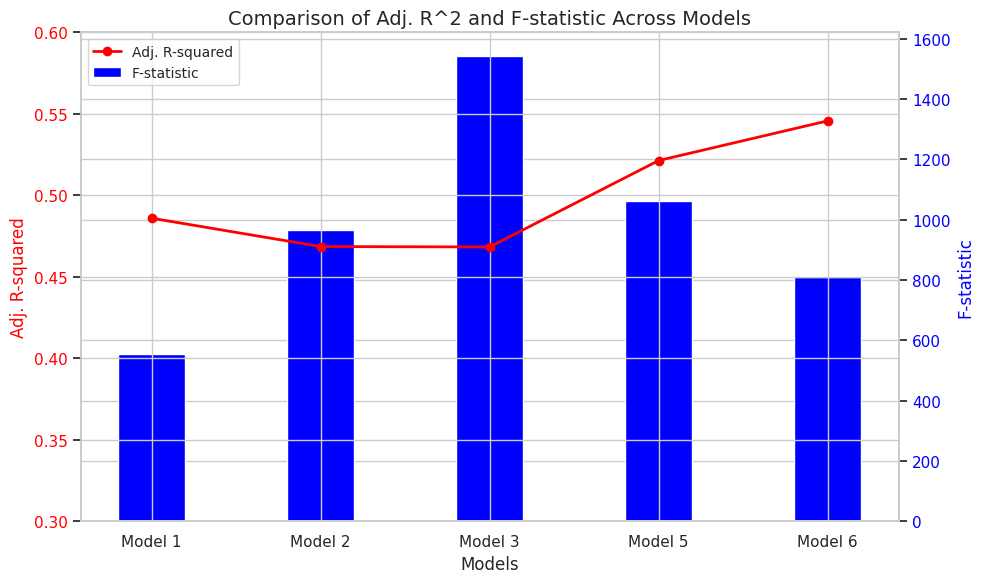

In [59]:
# Create data for the models 1, 2, 3, 5 and 6
model_comparison = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 5', 'Model 6'],
    'Adj_R_squared': [results_1.rsquared_adj, results_2.rsquared_adj, results_3.rsquared_adj, 
                      results_5.rsquared_adj, results_6.rsquared_adj],
    'F_statistic': [results_1.fvalue, results_2.fvalue, results_3.fvalue, 
                    results_5.fvalue, results_6.fvalue]
})

# Create plot 
fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(model_comparison['Model']))

# Create bar chart: F-statistic on the right axis
ax2 = ax1.twinx()  # zweite Achse teilen
ax2.bar(x, model_comparison['F_statistic'], color='blue', alpha=1, width=0.4, label='F-statistic')
ax2.set_ylabel('F-statistic', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create line chart: Adj. R^2 on the left axis
ax1.plot(x, model_comparison['Adj_R_squared'], label='Adj. R-squared', color='red', marker='o', linewidth=2, zorder=3)
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('Adj. R-squared', fontsize=12, color='red')
ax1.set_ylim(0.3, 0.6)  # Linke Achse zwischen 0.3 und 0.6
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_zorder(2)
ax1.patch.set_visible(False)

# Define labels and titles
ax1.set_xticks(x)
ax1.set_xticklabels(model_comparison['Model'])
ax1.set_title('Comparison of Adj. R^2 and F-statistic Across Models', fontsize=14)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

# Plot the final visualization
plt.tight_layout()
plt.show()

Now let's compare the R^2 for training and testing for the different models in the next visualization.

In [60]:
# Function for calculating the training and testing scores
def calculate_model_scores(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

# Prepare dataset for models and calculate training/testing scores
models_data = {
    "Model 1": (X_1, y_1),
    "Model 2": (X_2, y_2),
    "Model 3": (X_3, y_3),
    "Model 5": (X_5, y_5),
    "Model 6": (X_6_poly, y_6),
}
train_test_scores = {}
for model_name, (X, y) in models_data.items():
    train_score, test_score = calculate_model_scores(X, y)
    train_test_scores[model_name] = (train_score, test_score)

# Save results in DataFrame
scores_df = pd.DataFrame(
    train_test_scores, index=["Training Score", "Testing Score"]
).T
scores_df

,Training Score,Testing Score
Model 1,0.488123,0.482366
Model 2,0.469577,0.466746
Model 3,0.468510,0.468746
Model 5,0.523215,0.517884
Model 6,0.550393,0.535657


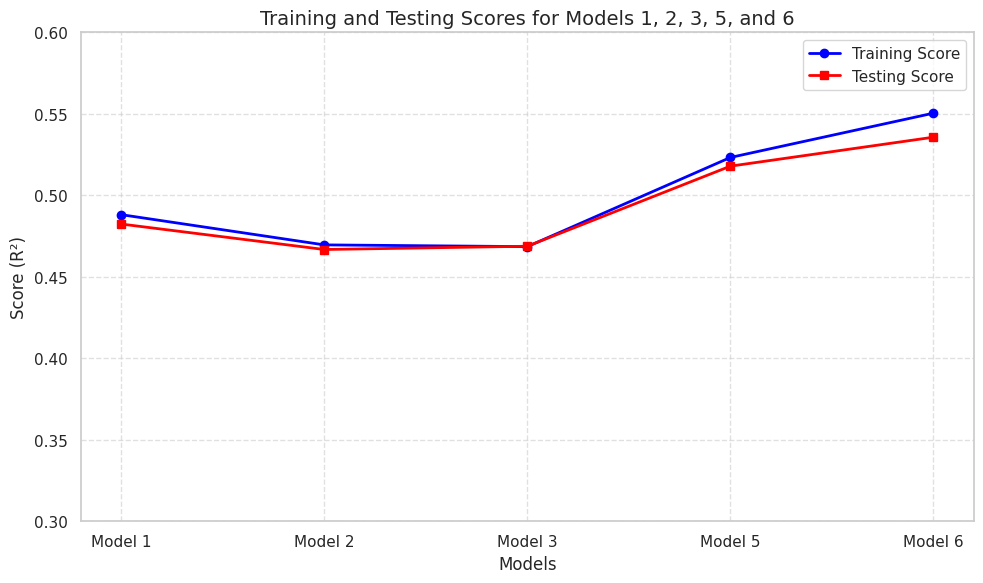

In [61]:
# Plot of the training and testing scores
plt.figure(figsize=(10, 6))
plt.plot(scores_df.index, scores_df["Training Score"], marker='o', label="Training Score", color="blue", linewidth=2)
plt.plot(scores_df.index, scores_df["Testing Score"], marker='s', label="Testing Score", color="red", linewidth=2)

# Define labels and titles
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score (R²)", fontsize=12)
plt.title("Training and Testing Scores for Models 1, 2, 3, 5, and 6", fontsize=14)
plt.ylim(0.3, 0.6)  # Begrenzung der y-Achse
plt.xticks(rotation=0)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Plot the final visualization
plt.tight_layout()
plt.show()

## K nearest neighbors and cross validation 

In [62]:
X = pd.DataFrame({'temperature': df['temperature'], 'humidity' : df['humidity'], 'hour' : df['hour'], 'visibility' : df['visibility'], 'dew_point_temperature' : df['dew_point_temperature'], 'solar_radiation' : df['solar_radiation'], 'seasons':df['seasons'],'year' : df['year'] })

The type date is compatible with KNN

In [63]:
X.head()

,temperature,humidity,hour,visibility,dew_point_temperature,solar_radiation,seasons,year
0,-5.2,37,0,2000,-17.6,0.0,0,2017
1,-5.5,38,1,2000,-17.6,0.0,0,2017
2,-6.0,39,2,2000,-17.7,0.0,0,2017
3,-6.2,40,3,2000,-17.6,0.0,0,2017
4,-6.0,36,4,2000,-18.6,0.0,0,2017


In [64]:
y = pd.DataFrame({ 'rented_bike_count': df['rented_bike_count']})
y.head()

,rented_bike_count
0,254
1,204
2,173
3,107
4,78


In [67]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state =7, train_size=0.75)

In [68]:
knn = KNeighborsRegressor(n_neighbors=7)

In [69]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [70]:
y_pred = knn.predict(X_val)
mse = mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
print ("The real model accuracy is: \n",r2) 

The real model accuracy is: 
 0.5544623968856592


In [71]:
m = r2
n = 0
for k in range (2,200):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    
    if r2>m :
        m=r2
        n=k
[m,n]

[0.5544623968856592, 0]

## Random Forest Regressor and cross validation 

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

rfr= RandomForestRegressor(n_estimators=100, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rfr.fit(X_train, y_train)

# Predict on the test set
y_pred = rfr.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor Performance:
Root Mean Square Error (RMSE): 312.10
Mean Absolute Error (MAE): 184.17
R² Score: 0.77


In [73]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Ensure 'auto' is removed
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform the search
random_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate on the test set with the best model
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Tuned Random Forest Regressor Performance:")
print(f"Root Mean Square Error (RMSE): {rmse_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"R² Score: {r2_best:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Tuned Random Forest Regressor Performance:
Root Mean Square Error (RMSE): 309.21
Mean Absolute Error (MAE): 183.14
R² Score: 0.77


Cross Validation code for Random Forest Regression

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Define a custom scoring function for RMSE
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,  # Number of folds
    scoring=scorer,
    n_jobs=-1  # Use all processors
)

# Convert negative MSE to RMSE for interpretability
rmse_scores = np.sqrt(-cv_scores)

# Output cross-validation results
print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores):.2f}")

/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/adrian/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Cross-Validation RMSE Scores: [312.65925475 306.4255431  323.56634247 299.0007597  326.5604492 ]
Mean RMSE: 313.64
Standard Deviation of RMSE: 10.32


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=3,       # Maximum tree depth
    subsample=0.8,     # Fraction of samples used for training
    random_state=42    # Reproducibility
)

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Predict on test data
y_pred = gbr.predict(X_test)


/home/adrian/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [76]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Performance of Tuned Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Performance of Tuned Gradient Boosting Regressor:
Mean Absolute Error (MAE): 183.14
Root Mean Squared Error (RMSE): 309.21
R² Score: 0.77


In [77]:
# Evaluate R² on training data
train_r2 = best_model.score(X_train, y_train)

# Evaluate R² on testing data
test_r2 = best_model.score(X_test, y_test)

# Print results
print(f"Training R²: {train_r2:.2f}")
print(f"Testing R²: {test_r2:.2f}")

Training R²: 0.93
Testing R²: 0.77


huge problem of overfitting and low score in R^2, need to check data manipulation and data normalization and see if we can improve accuracy and performances for each model. try also Bootstrapping


In [78]:
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Number of bootstrap samples
n_bootstrap = 100

# Store trained models
models = []

# Bootstrapping: Train multiple models on bootstrapped samples
for i in range(n_bootstrap):
    # Resample the training data with replacement
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42 + i)
    
    # Train a Gradient Boosting Regressor on the resampled data
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Save the model
    models.append(model)

# Aggregated predictions on the test set
y_pred_bootstrap = np.mean([model.predict(X_test) for model in models], axis=0)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_bootstrap)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_bootstrap))
r2 = r2_score(y_test, y_pred_bootstrap)

# Print results
print("Bootstrapped Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

/home/adrian/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/home/adrian/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/home/adrian/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/home/adrian/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning:

Bootstrapped Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 199.93
Root Mean Squared Error (RMSE): 325.73
R² Score: 0.75
